In [0]:
from google.colab import files, auth, drive

In [0]:
# Mount to drive
drive.mount('/content/gdrive', force_remount=True)
data_dir_drive ='/content/gdrive/My Drive/Colab Notebooks/NLP1/Lab3'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 1
Choose a wikipedia article. You will download and acces the article using this python module: wikipedia. Use the content property to extract the text. Print the title of the article and the first N=200 words from the article to verify that all works well. Print the POS-tagging for the first N=20 sentences.

In [0]:
! pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=dfb0fa38921a5f9563e5abe28b7ce788e26c919ae0089865c07c64c75c090fe8
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
! pip install nltk

In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> tagsets
      Unzipping help/tagsets.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

wikipedia.set_lang("en")
palde = wikipedia.page("George Emil Palade")
print(palde.title)
data = palde.content
words = word_tokenize(data)
words2 = [x for x in words]
print(words2[:200])

George Emil Palade
['George', 'Emil', 'Palade', 'ForMemRS', 'HonFRMS', '(', 'Romanian', 'pronunciation', ':', '[', 'ˈd͡ʒe̯ord͡ʒe', 'eˈmil', 'paˈlade', ']', '(', 'listen', ')', ';', 'November', '19', ',', '1912', '–', 'October', '7', ',', '2008', ')', 'was', 'a', 'Romanian-American', 'cell', 'biologist', '.', 'Described', 'as', '``', 'the', 'most', 'influential', 'cell', 'biologist', 'ever', "''", ',', 'in', '1974', 'he', 'was', 'awarded', 'the', 'Nobel', 'Prize', 'in', 'Physiology', 'and', 'Medicine', 'along', 'with', 'Albert', 'Claude', 'and', 'Christian', 'de', 'Duve', '.', 'The', 'prize', 'was', 'granted', 'for', 'his', 'innovations', 'in', 'electron', 'microscopy', 'and', 'cell', 'fractionation', 'which', 'together', 'laid', 'the', 'foundations', 'of', 'modern', 'molecular', 'cell', 'biology', ',', 'the', 'most', 'notable', 'discovery', 'being', 'the', 'ribosomes', 'of', 'the', 'endoplasmic', 'reticulum', '–', 'which', 'he', 'first', 'described', 'in', '1955.Palade', 'also', 'recei

In [0]:
N=20

sentences = sent_tokenize(data)
for i in range(N):
    w_ = word_tokenize(sentences[i])
    w_tags = nltk.pos_tag(w_)
    print('Sent ' + str(i + 1) + ':')
    print(w_tags)

Sent 1:
[('George', 'NNP'), ('Emil', 'NNP'), ('Palade', 'NNP'), ('ForMemRS', 'NNP'), ('HonFRMS', 'NNP'), ('(', '('), ('Romanian', 'JJ'), ('pronunciation', 'NN'), (':', ':'), ('[', 'JJ'), ('ˈd͡ʒe̯ord͡ʒe', 'NNP'), ('eˈmil', 'NN'), ('paˈlade', 'NN'), (']', 'NNP'), ('(', '('), ('listen', 'VBN'), (')', ')'), (';', ':'), ('November', 'NNP'), ('19', 'CD'), (',', ','), ('1912', 'CD'), ('–', 'NNP'), ('October', 'NNP'), ('7', 'CD'), (',', ','), ('2008', 'CD'), (')', ')'), ('was', 'VBD'), ('a', 'DT'), ('Romanian-American', 'JJ'), ('cell', 'NN'), ('biologist', 'NN'), ('.', '.')]
Sent 2:
[('Described', 'NNP'), ('as', 'IN'), ('``', '``'), ('the', 'DT'), ('most', 'RBS'), ('influential', 'JJ'), ('cell', 'NN'), ('biologist', 'NN'), ('ever', 'RB'), ("''", "''"), (',', ','), ('in', 'IN'), ('1974', 'CD'), ('he', 'PRP'), ('was', 'VBD'), ('awarded', 'VBN'), ('the', 'DT'), ('Nobel', 'NNP'), ('Prize', 'NNP'), ('in', 'IN'), ('Physiology', 'NNP'), ('and', 'CC'), ('Medicine', 'NNP'), ('along', 'IN'), ('with', 'I

# 2 
Create a function that receives a part of speech tag and returns a list with all the words from the text (can be given as a parameter too) that represent that part of speech. Create a function that receives a list of POS tags and returns a list with words having any of the given POS tags (use the first function in implementing the second one).

In [0]:
def get_all_words_that_have_part_of_speech(partOfSpeech, data = data):
    sentences = sent_tokenize(data)
    res = []
    for s in sentences:
        w_ = word_tokenize(s)
        w_tags = nltk.pos_tag(w_)
        for (w, tag) in w_tags:
            if tag == partOfSpeech:
                res.append(w)

    return res

print(get_all_words_that_have_part_of_speech('CD'))

['19', '1912', '7', '2008', '1974', '1955.Palade', '1986', '1961', '1968', '1984', '19', '1912', '1940', '1946', '1952', '1958–1973', '1973–1990', '1990–2008', '1970', '1975', '12', '1974', '1992', '1975', '1981', '1988', '1960s', '1960s', 'two', 'One', '2009', '2003', '3', '6', '518–9', '1424-3903', '14730177.Haulică', '2002', '90', '107', '2', '223–5', '12638263', '2002', '3', '11', '871–6', '1471-0072', '12415304', '2001', '106', '2', '1', '1122-6714', '11730003', '1999', '1961', '10', '12', '2645–62', '1046-6673', '10589706', '1999', '1974', '1899–1983', '1912', '1917', '354', '9185', '1219.', '05', '75433-7', '10513750', '1999', '9', '10', '413–7', '99', '10481180', '1998', '103', '2', '65–81', '1122-6714', '9719773', '1983', '97', '1', '6345553', '1975', '20', '1', '74–6', '1094498', '1975', '64', '1', '20–2', '1094070', '9', '6', '229–30', '1970', '4927031']


In [0]:
def get_all_words_that_have_part_of_speech_all(partsOfSpeech, data = data):
    res = []
    for tag in partsOfSpeech:
        res = res + get_all_words_that_have_part_of_speech(tag, data)
    return list(set(res))

print(get_all_words_that_have_part_of_speech_all(['JJ', 'NN']))

['cell', '0300-8738', 'factor', 'organization', 'influential', 'transfer', 'school', 'following', 'doctor', '0019-5847', 'tribute', 'structure', 'Honorary', 'previous', 'Swiss', 'molecular', 'export', 'Intracellular', 'organelle', 'work', 'collaboration', 'notable', 'doi:10.1016/S0140-6736', 'unique', 'doi:10.1016/S0962-8924', 'prize', 'research', 'space', 'processing', 'XXI–XXXVIII', 'pathway', '0021-9525', 'naturalized', 'concise', 'first', 'paˈlade', 'excerpt', 'din', 'glomerular', 'development', 'von', 'Italian', 'good', 'current', 'appearing', 'Nature', 'microscopy', 'citizen', 'able', 'D3–7', '0039-9450', '01633-5', 'modern', 'synthesis', 'contemporary', 'early', 'wife', 'teacher', 'wall', '0962-8924', 'medico-chirurgicală', 'Education', 'intracellular', 'mother', 'Pancreatology', 'Palade', 'ribosome', 'approach', 'scientist', 'faculty', 'life', 'Weibel-Palade', 'pulse-chase', 'anatomist', 'pancreatic', 'philosophy', 'parallel', 'part', 'intact', 'winner', 'postdoctoral', 'zymoge

# 3 
Use the function above to print all the nouns (there are multiple tags for nouns), and, respectively all the verbs (corresponding to all verb tags). Also, print the percentage of content words (noun+verbs) from the entire text

In [0]:
nouns = get_all_words_that_have_part_of_speech_all(['NN', 'NNS', 'NNP', 'NNPS'])
verbs = get_all_words_that_have_part_of_speech_all(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])

print(nouns)
print(verbs)
print(str((len(nouns) + len(verbs)) *100 / len(word_tokenize(data))) + '%')

['cell', '0300-8738', 'factor', 'organization', 'transfer', 'notes', 'National', 'Iași', 'Davila', 'Professorship', 'school', 'Cell', 'following', 'Indian', 'approaches', 'doctor', 'Prize', 'Albert', 'documents', '0019-5847', 'tribute', 'Rockefeller', 'Ada', 'N', 'structure', 'Honorary', 'University', 'export', 'Association', 'Jolla', 'Chairman', 'Chambers', 'organelle', 'work', 'Weibel', 'U.S.', 'Yale', 'collaboration', 'doi:10.1016/S0140-6736', 'Kakusan', 'unique', 'doi:10.1016/S0962-8924', 'prize', 'Dean', 'October', 'Cellular', 'Cultural', 'Lecture', 'M', 'research', 'space', 'processing', 'XXI–XXXVIII', 'pathway', '0021-9525', 'Aspects', 'Chair', 'Trends', 'David', 'concise', 'San', 'Réne', 'George', 'Autobiography', 'Colvin', 'Emil', 'Science', 'H', 'Sciences', 'paˈlade', 'Ewald', 'excerpt', 'din', 'mitochondria', 'development', 'ISSN', 'Nephrology', 'Lucien', 'von', 'Diego', 'ribosomes', 'Christian', 'Dr.', 'I.', 'appearing', 'J', 'November', 'Nature', 'others', 'Molecular', 'Ho

# 4 
Print a table of four columns. The columns will be separated with the character "|". The head of the table will be:
Original word | POS | Simple lemmatization | Lemmatization
 with POS
that will compare the results of lemmatization (WordNetLemmatizer) without giving the part of speech and the lemmatization with the given part of speech for each word. The table must contain only words that give different results for the two lemmatizations (for example, the word "running" - without POS, the result will always be running, but with pos="v" it is "run"). The table will contain the results for the first N sentences from the text (each row corresponding to a word). Try to print only distinct results inside the table (for example, if a word has two occurnces inside the text, and matches the requirments for appearing in the table, it should have only one corresponding row).

In [0]:
! pip install prettytable

In [0]:
import prettytable
from nltk.stem import WordNetLemmatizer

from nltk.corpus import wordnet as wn

# WordNet POS tags are: NOUN = 'n', ADJ = 's', VERB = 'v', ADV = 'r', ADJ_SAT = 'a'
# Descriptions (c) https://web.stanford.edu/~jurafsky/slp3/10.pdf
tag_map = {
        'CC':None, # coordin. conjunction (and, but, or)  
        'CD':wn.NOUN, # cardinal number (one, two)             
        'DT':None, # determiner (a, the)                    
        'EX':wn.ADV, # existential ‘there’ (there)           
        'FW':None, # foreign word (mea culpa)             
        'IN':wn.ADV, # preposition/sub-conj (of, in, by)   
        'JJ':wn.ADJ, # adjective (yellow)                  
        'JJR':wn.ADJ, # adj., comparative (bigger)          
        'JJS':wn.ADJ, # adj., superlative (wildest)           
        'LS':None, # list item marker (1, 2, One)          
        'MD':None, # modal (can, should)                    
        'NN':wn.NOUN, # noun, sing. or mass (llama)          
        'NNS':wn.NOUN, # noun, plural (llamas)                  
        'NNP':wn.NOUN, # proper noun, sing. (IBM)              
        'NNPS':wn.NOUN, # proper noun, plural (Carolinas)
        'PDT':[wn.ADJ, wn.ADJ_SAT], # predeterminer (all, both)            
        'POS':None, # possessive ending (’s )               
        'PRP':None, # personal pronoun (I, you, he)     
        'PRP$':None, # possessive pronoun (your, one’s)    
        'RB':wn.ADV, # adverb (quickly, never)            
        'RBR':wn.ADV, # adverb, comparative (faster)        
        'RBS':wn.ADV, # adverb, superlative (fastest)     
        'RP':wn.ADJ, # particle (up, off)
        'SYM':None, # symbol (+,%, &)
        'TO':None, # “to” (to)
        'UH':None, # interjection (ah, oops)
        'VB':wn.VERB, # verb base form (eat)
        'VBD':wn.VERB, # verb past tense (ate)
        'VBG':wn.VERB, # verb gerund (eating)
        'VBN':wn.VERB, # verb past participle (eaten)
        'VBP':wn.VERB, # verb non-3sg pres (eat)
        'VBZ':wn.VERB, # verb 3sg pres (eats)
        'WDT':None, # wh-determiner (which, that)
        'WP':None, # wh-pronoun (what, who)
        'WP$':None, # possessive (wh- whose)
        'WRB':None, # wh-adverb (how, where)
        '$':None, #  dollar sign ($)
        '#':None, # pound sign (#)
        '“':None, # left quote (‘ or “)
        '”':None, # right quote (’ or ”)
        '(':None, # left parenthesis ([, (, {, <)
        ')':None, # right parenthesis (], ), }, >)
        ',':None, # comma (,)
        '.':None, # sentence-final punc (. ! ?)
        ':':None # mid-sentence punc (: ; ... – -)
    }

t = prettytable.PrettyTable(["Original word", "POS", "Simple lemmatization", "Lemmatization with POS"])

lem=WordNetLemmatizer()

N = 5

sentences = sent_tokenize(data)

word_and_part_of_speech = []

for i in range(N):
    w_ = word_tokenize(sentences[i])
    w_tags = nltk.pos_tag(w_)
    word_and_part_of_speech = word_and_part_of_speech + w_tags

word_and_part_of_speech = list(set(word_and_part_of_speech))

print(word_and_part_of_speech)

for word, tag in word_and_part_of_speech:
    lemW = lem.lemmatize(word)
    if tag in tag_map.keys():
        if tag_map[tag] is not None:
            lemWtag = lem.lemmatize(word, tag_map[tag])

            if lemW != lemWtag:
                t.add_row([word, tag, lemW, lemWtag]) 
print(t)

[('in', 'IN'), ('elected', 'VBD'), ('Claude', 'NNP'), ('Described', 'NNP'), ('a', 'DT'), ('which', 'WDT'), ('Prize', 'NNP'), ('ForMemRS', 'NNP'), ('de', 'NNP'), ('structures', 'NNS'), ('``', '``'), ('Nobel', 'NNP'), ('2008', 'CD'), ('Member', 'NNP'), ('Palade', 'NNP'), ('endoplasmic', 'JJ'), ('foundations', 'NNS'), ('Society', 'NNP'), ('U.S.', 'NNP'), ('with', 'IN'), ('ˈd͡ʒe̯ord͡ʒe', 'NNP'), ('prize', 'NN'), ('Academy', 'NNP'), ('1955.Palade', 'CD'), ('November', 'NNP'), ('–', 'NN'), ('electron', 'NN'), (']', 'NNP'), ('7', 'CD'), ('molecular', 'JJ'), ('(', '('), ('Romanian', 'JJ'), ('and', 'CC'), ('biology', 'NN'), (';', ':'), ('he', 'PRP'), ('awarded', 'VBN'), ('discovery', 'NN'), ('modern', 'JJ'), ('HonFRMS', 'NNP'), ('cells', 'NNS'), ('Fellow', 'NNP'), ('highly', 'RB'), ('The', 'DT'), ('.', '.'), ('Romanian-American', 'JJ'), ('Medicine', 'NNP'), ('host', 'NN'), ('1974', 'CD'), ('Emil', 'NNP'), ('Science', 'NNP'), ('In', 'IN'), ('for', 'IN'), ('discoveries', 'NNS'), ('reticulum', 'NN

# 5 
Print a graphic showing the number of words for each part of speech. If there are too many different parts of speech, you can print only those with a higher number of corresponding words.

In [0]:
from nltk.data import load
tagdict = load('help/tagsets/upenn_tagset.pickle')

nums = []

for tag in tagdict.keys():
    nums.append(len(get_all_words_that_have_part_of_speech(tag)))

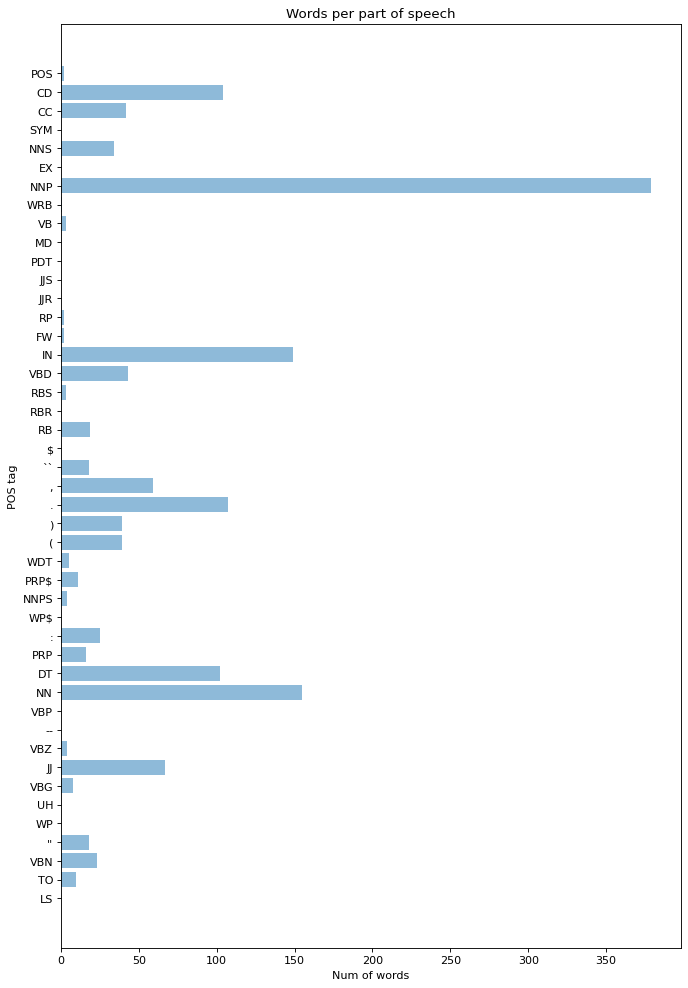

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 15), dpi=80, facecolor='w', edgecolor='k')

objects = tagdict.keys()
y_pos = np.arange(len(objects))

plt.barh(y_pos, nums, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Num of words')
plt.ylabel('POS tag')
plt.title('Words per part of speech')

plt.show()